In [10]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                                ExtraTreesClassifier,
                                BaggingClassifier)

from sklearn.metrics import confusion_matrix

## Import Data

In [3]:
df_naut = pd.read_csv('../data/nlp_naut_data.csv')
df_stem = pd.read_csv('../data/nlp_stem_data.csv')
df_lemma = pd.read_csv('../data/nlp_lemma_data.csv')
df_lem_stem = pd.read_csv('../data/nlp_lem_stem_data.csv')

## Preprocessing

In [4]:
target = 'target'

y_naut = df_naut[target]
X_naut = df_naut[[col for col in df_naut.columns if col != target]]

y_stem = df_stem[target]
X_stem = df_stem[[col for col in df_stem.columns if col != target]]

y_lemma = df_lemma[target]
X_lemma = df_lemma[[col for col in df_lemma.columns if col != target]]

y_lem_stem = df_lem_stem[target]
X_lem_stem = df_lem_stem[[col for col in df_lem_stem.columns if col != target]]

In [5]:
# Create Standard Scale Versions
ss = StandardScaler()

X_naut_ss = ss.fit_transform(X_naut)
X_stem_ss = ss.fit_transform(X_stem)
X_lemma_ss = ss.fit_transform(X_lemma)
X_lem_stem_ss = ss.fit_transform(X_lem_stem)

## Model and Data Selection

In [5]:
# Create helper functions for evaluating our models
def print_scores(scores):
    print('Score: {:.2f} +- {:.2f}'.format(scores.mean(), 2*scores.std()), end = '     ')
    print('min: {:.2f}, max: {:.2f}'.format(min(scores),max(scores)))

def master_comparison_list(X, X_ss, y):
    
    logit = LogisticRegression(n_jobs = -1,)
    scores = cross_val_score(logit, X_ss, y)
    print('Logit', end = '            ')
    print_scores(scores)
    
    knn = KNeighborsClassifier(n_jobs = -1)
    scores = cross_val_score(knn, X_ss, y)
    print('\nKNN', end = '              ')
    print_scores(scores)
    
    dt = DecisionTreeClassifier()
    scores = cross_val_score(dt, X, y)
    print('\nDecision Tree', end = '    ')
    print_scores(scores)
   
    bdt = BaggingClassifier(dt,
                            n_jobs = -1)
    scores = cross_val_score(bdt, X, y)
    print('\nBagging', end = '          ')
    print_scores(scores)

    rf = RandomForestClassifier(n_jobs = -1)
    scores = cross_val_score(rf, X, y)
    print('\nRandom Forest', end = '    ')
    print_scores(scores)
    
    et = ExtraTreesClassifier(n_jobs = -1)
    scores = cross_val_score(et, X, y)
    print('\nExtra Trees', end = '      ')
    print_scores(scores)

In [6]:
master_comparison_list(X_naut, X_naut_ss, y_naut)

Logit            Score: 0.69 +- 0.03     min: 0.67, max: 0.72

KNN              Score: 0.59 +- 0.02     min: 0.58, max: 0.60

Decision Tree    Score: 0.63 +- 0.03     min: 0.61, max: 0.65

Bagging          Score: 0.69 +- 0.02     min: 0.67, max: 0.70

Random Forest    Score: 0.71 +- 0.03     min: 0.69, max: 0.73

Extra Trees      Score: 0.69 +- 0.03     min: 0.68, max: 0.71


In [7]:
master_comparison_list(X_stem, X_stem_ss, y_stem)

Logit            Score: 0.70 +- 0.02     min: 0.68, max: 0.71

KNN              Score: 0.58 +- 0.03     min: 0.56, max: 0.60

Decision Tree    Score: 0.64 +- 0.03     min: 0.62, max: 0.66

Bagging          Score: 0.69 +- 0.03     min: 0.68, max: 0.71

Random Forest    Score: 0.71 +- 0.02     min: 0.70, max: 0.73

Extra Trees      Score: 0.70 +- 0.03     min: 0.68, max: 0.72


In [8]:
master_comparison_list(X_lemma, X_lemma_ss, y_lemma)

Logit            Score: 0.70 +- 0.02     min: 0.69, max: 0.71

KNN              Score: 0.57 +- 0.02     min: 0.56, max: 0.59

Decision Tree    Score: 0.64 +- 0.03     min: 0.61, max: 0.65

Bagging          Score: 0.69 +- 0.03     min: 0.67, max: 0.71

Random Forest    Score: 0.71 +- 0.03     min: 0.69, max: 0.72

Extra Trees      Score: 0.69 +- 0.04     min: 0.67, max: 0.72


In [9]:
master_comparison_list(X_lem_stem, X_lem_stem_ss, y_lem_stem)

Logit            Score: 0.70 +- 0.02     min: 0.69, max: 0.71

KNN              Score: 0.58 +- 0.03     min: 0.55, max: 0.59

Decision Tree    Score: 0.63 +- 0.02     min: 0.62, max: 0.65

Bagging          Score: 0.69 +- 0.04     min: 0.67, max: 0.72

Random Forest    Score: 0.71 +- 0.02     min: 0.69, max: 0.73

Extra Trees      Score: 0.69 +- 0.03     min: 0.68, max: 0.72


**Interpretation** The purpose of the `master_comparison_list` is to identify which dataframe to pursue model optimization on, as well as which models are worth exploring a `GridSearchCV` on.





The above scorings indicate that under default configuration and regardless of dataframe:
  *  KNN performs the worst
  *  Logistic Regression (Logit) is the 2nd or 3rd most accurate model
  *  Random Forest outperfoms Extra Trees, Bagging, and Decision Trees

Based on the above, **Random Forest** and **Logit** will be further explored

The above scorings also indicate that under default configuration:
  *  The Naut dataframe--just tf-idf vectorization applied--performs the worst
  *  The remaining three dataframes are all very close
  
Based on the above, the **lemma dataframe** will be used during further exploration due to its more accessible interpretation

## Modelling

### Baseline

In [6]:
df_lemma.target.value_counts(normalize=True)

0    0.504449
1    0.495551
Name: target, dtype: float64

**Observation**
The baseline for our model will be 50.44%. Given our scores in the above section, the data discovered during EDA and NLP should be sufficient to answer the question.

### Logit Variable Selection via Lasso

In [11]:
# fit Logit CV
logit_cv = LogisticRegressionCV(penalty='l1',
                                solver = 'liblinear',
                                n_jobs = -1)

In [13]:
logit_cv.fit(X_lemma_ss, y_lemma)
print("Best C: ", logit_cv.C_[0])
print("Score: ",logit_cv.score(X_lemma_ss, y_lemma))

Best C:  0.046415888336127774
Score:  0.7165288391081336


In [14]:
# fit a logistic regression with the best C identified above
logit = LogisticRegression(penalty='l1',
                           solver = 'liblinear',
                           C = logit_cv.C_[0])

logit.fit(X_lemma_ss, y_lemma)

LogisticRegression(C=0.046415888336127774, penalty='l1', solver='liblinear')

In [15]:
# Get columns from lasso feature selection
final_columns_lasso = [col for col, coef in zip(X_lemma.columns, logit.coef_[0]) if coef]
len(final_columns_lasso)

169

**Observation** We have gone from 247 variables down to 169.

In [16]:
# instantiate logistic regression without lasso penalty
logit = LogisticRegression(n_jobs=-1)

scores = cross_val_score(logit, pd.DataFrame(X_lemma_ss, columns = X_lemma.columns)[final_columns_lasso], y_lemma)
print_scores(scores)

Score: 0.70 +- 0.01     min: 0.69, max: 0.71


**Observation** No substantial increase in score

In [17]:
# fit logistic regression to get coefficients for interpretation
logit.fit(pd.DataFrame(X_lemma_ss, columns = X_lemma.columns)[final_columns_lasso], y_lemma)

LogisticRegression(n_jobs=-1)

In [18]:
coef_list = pd.Series(logit.coef_[0],
                      index = pd.DataFrame(X_lemma_ss, columns = X_lemma.columns)[final_columns_lasso].columns)

In [19]:
# top 10 positively affected predictor variables
coef_list.sort_values(ascending=False)[:10]

post_age_min               0.796585
is_successful_subreddit    0.658318
subreddit_subscribers      0.442217
NOUN                       0.170543
PROPN                      0.158819
VERB                       0.140580
game                       0.107419
update                     0.101846
woman                      0.098876
people                     0.085564
dtype: float64

In [21]:
# top 10 negatively affected predictor variables
coef_list.sort_values()[:10]

art                      -0.120293
is_successful_domain     -0.114925
is_reddit_media_domain   -0.114925
CCONJ                    -0.085136
light                    -0.079151
polarity                 -0.075228
PUNCT                    -0.074444
little                   -0.070405
beautiful                -0.065993
work                     -0.058328
dtype: float64

**Observation** The presence of words like `game` and `update` are valid recommendations from this model. However, the IDF of the corpus would need to be calculated in order to provide an interpretation that is actionable as a function of the percentage of words in the title that are `game` or `update`.

### Random Forest Modeling via GridSearch

In [7]:
rf_params = {
    'n_estimators': [100,250,500],
    'max_depth': [5,10,None],
    'min_samples_split': [2,5,10]
}

In [23]:
rf_gridsearch=GridSearchCV(RandomForestClassifier(n_jobs = -1),
              rf_params,
              cv = 5,
              verbose = 1)

In [24]:
rf_gridsearch.fit(X_lemma,y_lemma)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250, 500]},
             verbose=1)

In [25]:
rf_gridsearch.best_score_

0.7220776929378275

In [26]:
rf_gridsearch.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

In [8]:
# instantiate random forest with gridsearch best params
rf = RandomForestClassifier(n_jobs = -1,
                           min_samples_split=10,
                           n_estimators = 250,
                           random_state=66)

In [28]:
rf.fit(X_lemma, y_lemma)

RandomForestClassifier(min_samples_split=10, n_estimators=250, n_jobs=-1,
                       random_state=66)

In [29]:
pd.Series(rf.feature_importances_, index = X_lemma.columns).sort_values(ascending = False)[:20]

subreddit_subscribers      0.138247
post_age_min               0.122975
is_successful_subreddit    0.048124
title_length               0.046760
title_word_count           0.029282
NOUN_percent               0.024678
polarity                   0.022242
VERB_percent               0.022138
PUNCT_percent              0.020327
ADP_percent                0.018472
subjectivity               0.018362
PRON_percent               0.017735
NOUN                       0.017660
ADJ_percent                0.016920
DET_percent                0.016311
PROPN_percent              0.016285
AUX_percent                0.015692
ADV_percent                0.012502
VERB                       0.011726
PROPN                      0.011645
dtype: float64

**Observation** The percent values appear to be above their count amount counterpart. Remove them.

In [12]:
X_lemma_adj = X_lemma.drop(['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET'
                                , 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON'
                                , 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X'],
                              axis = 1)

In [31]:
rf.fit(X_lemma_adj, y_lemma)

RandomForestClassifier(min_samples_split=10, n_estimators=250, n_jobs=-1,
                       random_state=66)

In [32]:
pd.Series(rf.feature_importances_, index = X_lemma_adj.columns).sort_values(ascending = False)[:20]

subreddit_subscribers      0.149054
post_age_min               0.132123
title_length               0.053768
is_successful_subreddit    0.048185
title_word_count           0.034897
NOUN_percent               0.029760
VERB_percent               0.028447
polarity                   0.025215
PUNCT_percent              0.024297
ADP_percent                0.023106
PRON_percent               0.021893
PROPN_percent              0.021033
AUX_percent                0.020990
subjectivity               0.020813
ADJ_percent                0.020683
DET_percent                0.019915
ADV_percent                0.015443
PART_percent               0.012760
NUM_percent                0.011958
is_successful_domain       0.011494
dtype: float64

In [33]:
scores = cross_val_score(rf, pd.DataFrame(X_lemma, columns = X_lemma.columns), y_lemma)
print_scores(scores)

Score: 0.72 +- 0.02     min: 0.70, max: 0.73


In [34]:
scores = cross_val_score(rf, pd.DataFrame(X_lemma_adj, columns = X_lemma_adj.columns), y_lemma)
print_scores(scores)

Score: 0.72 +- 0.02     min: 0.70, max: 0.73


**Observation** No real movement in scores, go with the newly adjusted dataframe to make interpretation clearer.

### Investigate High Feature Importance Attributes

In [35]:
df_lemma.groupby('target').subreddit_subscribers.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,9.075587e+05,2.784150e+06,5381.0,105358.5,248789.0,657184.0,40814502.0
1,4734.0,3.255456e+06,6.646656e+06,8339.0,295479.0,807636.0,2406971.5,40854908.0


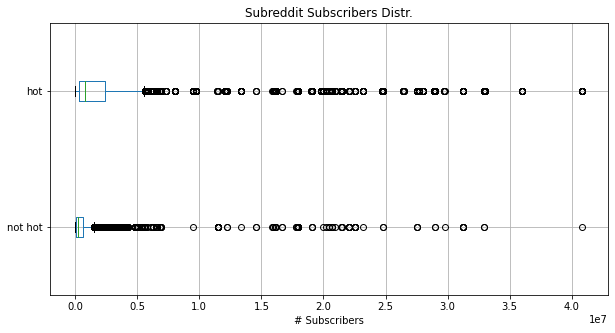

In [37]:
box = pd.DataFrame([df_lemma[df_lemma.target==0].subreddit_subscribers,
                    df_lemma[df_lemma.target==1].subreddit_subscribers],
                   index = ['not hot', 'hot']) 
box = box.T.boxplot(vert=False,)
box.set_title("Subreddit Subscribers Distr.")
box.set_xlabel("# Subscribers")
fig = plt.gcf()
fig.set_size_inches(10,5);

**Interpretation** Both subsets are right skewed with max values of 40M, but the value of the upper quartile for Not Hot being only 657K indicates that a significant amount of Not Hot posts are in these types of small subreddits (compare this to Hot's upper quartile of 2.4M).

This indicates that posts should at least be 2.4M in subscriber size to increase chances of post success. 

In [38]:
df_lemma.groupby('target').post_age_min.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,403.134818,192.785002,22.599620,256.027083,374.260253,524.701175,1392.201954
1,4734.0,535.906795,238.825469,26.250978,358.699023,508.571000,690.303498,1426.258418


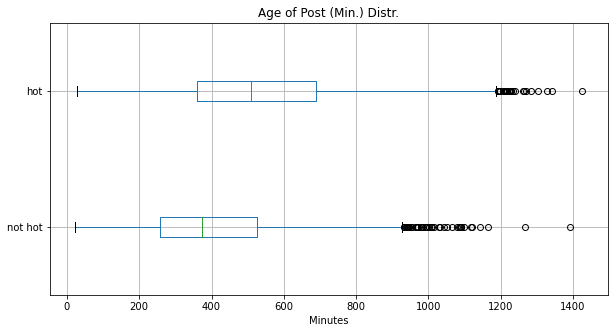

In [39]:
box = pd.DataFrame([df_lemma[df_lemma.target==0].post_age_min,
                    df_lemma[df_lemma.target==1].post_age_min],
                   index = ['not hot', 'hot']) 
box = box.T.boxplot(vert=False,)
box.set_title("Age of Post (Min.) Distr.")
box.set_xlabel("Minutes")
fig = plt.gcf()
fig.set_size_inches(10,5);

**Interpretation** Unlike the other variables, `post_age_min` isn't a controllable variable in that you cannot artificially increase a post's age. However, as Hot posts trend higher in `post_age_min`, it is recommended that 8 hours pass before determining if a post is *not* successful.

In [40]:
df_lemma.groupby('target').title_length.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,41.960365,38.651763,1.0,18.5,31.0,53.0,300.0
1,4734.0,58.076468,50.396057,1.0,25.0,43.0,74.0,300.0


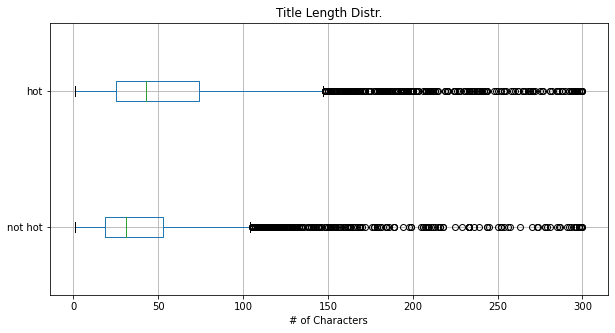

In [41]:
box = pd.DataFrame([df_lemma[df_lemma.target==0].title_length,
                    df_lemma[df_lemma.target==1].title_length],
                   index = ['not hot', 'hot']) 
box = box.T.boxplot(vert=False,)
box.set_title("Title Length Distr.")
box.set_xlabel("# of Characters")
fig = plt.gcf()
fig.set_size_inches(10,5);


**Interpretation** Hot posts have `title_lengths` trending upwards. This indicates that posts should be somewhat long and not rely on single words or emojis for titles.

In [42]:
df_lemma.groupby('target').VERB_percent.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,0.109071,0.136179,0.0,0.0,0.085714,0.166667,1.0
1,4734.0,0.120348,0.127492,0.0,0.0,0.111111,0.169913,1.0


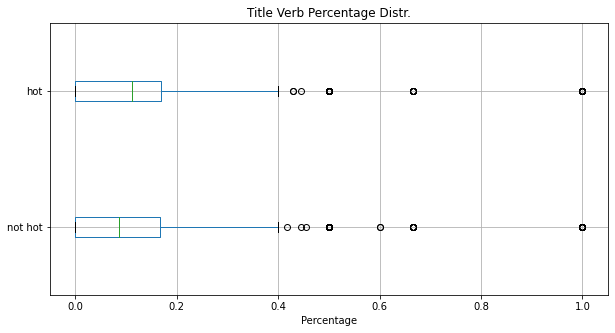

In [43]:
box = pd.DataFrame([df_lemma[df_lemma.target==0].VERB_percent,
                    df_lemma[df_lemma.target==1].VERB_percent],
                   index = ['not hot', 'hot']) 
box = box.T.boxplot(vert=False,)
box.set_title("Title Verb Percentage Distr.")
box.set_xlabel("Percentage")
fig = plt.gcf()
fig.set_size_inches(10,5);


**Interpretation** A key takeaway here is that there is upward pressure for Hot posts on the percent of Verbs in the title. Even though the upper quartile values are about even, the density of the Hot posts is still higher overall for percent of Verbs.

This indicates that maintaining a solid presence of verbs in the 10-12% range will help yield a better-performing post.

In [44]:
df_lemma.groupby('target').is_reddit_media_domain.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,0.841046,0.365671,0.0,1.0,1.0,1.0,1.0
1,4734.0,0.708492,0.454505,0.0,0.0,1.0,1.0,1.0


**Interpretation** Not Hot posts were on a reddit media domain more often than Hot posts. Both subsets have a median `is_reddit_media_domain` value of TRUE but the Not Hot posts are even more heavily weighted in that direction with the lower quartile point being a value of TRUE as well.

This indicates that there is opportunity on the side of *not* using a reddit media domain when it isn't convenient or necessary such as hosting videos on a different site or direct linking to the source site. A well-known complaint about reddit media domains are the video hosting.

## Confusion Matrices

In [13]:
predicted = cross_val_predict(rf, X_lemma_adj, y_lemma, cv=5)

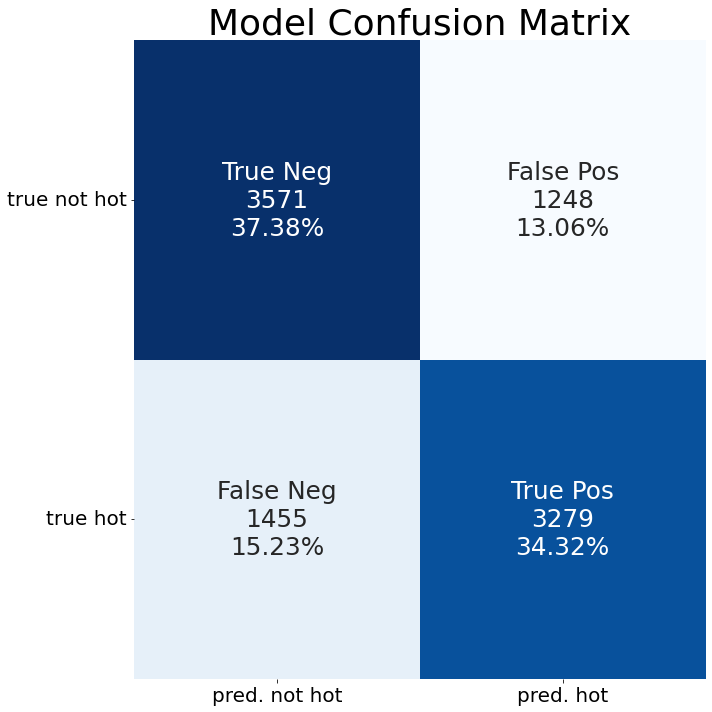

In [14]:
# https://www.tutorialspoint.com/how-to-hide-the-colorbar-of-a-seaborn-heatmap
# https://stackoverflow.com/questions/33104322/auto-adjust-font-size-in-seaborn-heatmap

cf_matrix = confusion_matrix(y_lemma, predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)




chart = sns.heatmap(cf_matrix,
                    annot=labels, annot_kws={"size": 35 / np.sqrt(len(cf_matrix))},
                    fmt='', cmap='Blues', cbar=False,
            xticklabels=['pred. not hot','pred. hot'],
            yticklabels=['true not hot', 'true hot'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, fontsize = 20)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0, fontsize = 20)

chart.set_title("Model Confusion Matrix", fontsize=36)

fig = plt.gcf()
fig.set_size_inches(10,10)

plt.tight_layout()
plt.savefig('../images/confusion_matrix.png', transparent=True);

In [1]:
%%html
<style>
table {float:left}
</style>

**The model performance on seen data:**

|Metric|Score|
|---|---|
|Accuracy|96.64%|
|Precision|97.98%|
|Recall|95.18%|
|Specificity|98.07%|
|F1|96.56%|

**Interpretation** An important call out from the Confusion Matrix is the False Positive Rate amount being 1.9% with 93 False Positives overall. When it comes to putting resources behind a Reddit post with the intent to get traction, this being the most minimized block of the matrix is good indication for the model's usefulness.

## Conclusion

At the high level, a few easy recommendations for getting an engaging Reddit post:
  1.  **Be Patient:**  Reddit takes the age of the post into account for Hot! Give the post around 8 hours to really rev up before making a final call on its success.
  2.  **Aim for large subreddits:**  More eyeballs means more possible commenters. Look 2.5M subscribers or more and pay attention to the submission guidelines and the meta of the subreddit.
  3.  **Action words:**  The percent of verbs in a title matters. Maintain a 10-12% ratio to keep things in a successful prose
  4.  **Avoid Short Titles:**  Single words or plain emojis are not proven winners
  5.  **Reddit Media Domains are not an absolute:**  They are convenient and useful, but not a one-size-fits-all. Select your domain with purpose.

By applying the above recommendations, a post is in a better position overall to be more engaging (aka have a greater than median number of comments!). The model can be focused on specific subreddits in the future if a specific redditor-population is deemed more valuable than the average redditor. Another possible focus could be on the type of post trying to be submitted. There will be different pushes and pulls for a post that is a text blob, an image, a gif, a video, an article, etc.

The model created here could also be useful for any adjacent projects fivethirtyeight may have with regard to Reddit and its engaging posts. With the Accuracy of 96% on seen data and 72% accuracy on cross validated data, the model can be useful for flagging future posts as hot or not.